# Dependencies

In [30]:
import os
import logging
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd())



c:\Users\Christian\OneDrive - The University of Colorado Denver\Current Classes\CSCI_4930_H01_ML\006_Activities\drb-fall24-ml\week-01


## Define the log directory and file

In [31]:
log_dir = 'logs'
log_file = 'week-01-activities.log'

## Create the logs directory if it doesn't exist

In [32]:
if not os.path.exists(log_dir):
    os.makedirs(log_dir)

## Logging configuration

In [33]:
logging.basicConfig(
    level=logging.DEBUG,
    format='%(levelname)-6s | %(asctime)s | %(message)s',
    filename=os.path.join(log_dir, log_file),
    filemode='w',
)

logger = logging.getLogger()

# Q-3


* How many rows are in dataset: `week-01/datasets/A.csv`? How about in `week-01/datasets/B.txt` and in `week-01/datasets/C.csv`?

### File paths (relative to the current working directory)

In [34]:
# Use an absolute path if necessary
file_A = r'c:\Users\Christian\OneDrive - The University of Colorado Denver\Current Classes\CSCI_4930_H01_ML\006_Activities\drb-fall24-ml\week-01\datasets\A.csv'

file_B = r'c:\Users\Christian\OneDrive - The University of Colorado Denver\Current Classes\CSCI_4930_H01_ML\006_Activities\drb-fall24-ml\week-01\datasets\B.txt'
file_C = r'c:\Users\Christian\OneDrive - The University of Colorado Denver\Current Classes\CSCI_4930_H01_ML\006_Activities\drb-fall24-ml\week-01\datasets\C.csv'
file_D = r'c:\Users\Christian\OneDrive - The University of Colorado Denver\Current Classes\CSCI_4930_H01_ML\006_Activities\drb-fall24-ml\week-01\datasets\D.txt'

## Load datasets

In [35]:
df_A = pd.read_csv(file_A)
df_B = pd.read_csv(file_B, delimiter='\s+')  # Assuming B.txt is tab-delimited
df_C = pd.read_csv(file_C, delimiter=';', engine='python', on_bad_lines='skip')  # Skipping bad lines
df_D = pd.read_csv(file_D, delimiter='\s+', header=None)  # Assuming D.txt is tab-delimited

## Get the number of rows

In [36]:
rows_A = df_A.shape[0]
rows_B = df_B.shape[0]
rows_C = df_C.shape[0]

## Print the number of rows

In [37]:
print(f"Number of rows in A.csv: {rows_A}")
print(f"Number of rows in B.txt: {rows_B}")
print(f"Number of rows in C.csv: {rows_C}")

Number of rows in A.csv: 9000
Number of rows in B.txt: 232042
Number of rows in C.csv: 78


## Class answer

In [38]:
with open(file_A) as f:
    counter = 0
    for line in f:
        counter += 1
    logger.info(f'num lines of A is {counter}')

In [39]:
with open(file_B) as f:
    counter = 0
    for line in f:
        counter += 1
    logger.info(f'num lines of B is {counter}')

In [40]:
with open(file_C,'r') as f:
    counter = 0
    for line in f:
        counter += 1
    logger.info(f'num lines of C is {counter}')

In [41]:
#a better ~ time-efficient way
with open(file_A,'r') as f:
    logger.info(f'num lines of A is {sum([1 for _ in f])}')
    

# Q-4

* How many samples are in dataset: `week-01/datasets/A.csv`? How about in `week-01/datasets/B.txt` and in `week-01/datasets/C.csv`?


## Research Answer


### Get the number of rows (samples)

In [42]:
rows_A = df_A.shape[0]
rows_B = df_B.shape[0]
rows_C = df_C.shape[0]

### Print the number of samples (rows)

In [43]:
print(f"Number of rows/samples in A.csv: {rows_A}")
print(f"Number of rows/samples in B.txt: {rows_B}")
print(f"Number of rows/samples in C.csv: {rows_C}")

Number of rows/samples in A.csv: 9000
Number of rows/samples in B.txt: 232042
Number of rows/samples in C.csv: 78


## Class Answers

In [44]:
A = pd.read_csv(file_A,
                     sep=',', #default is comma (,)
                     header=0, #default is `infer` ~ header=0th row
                    )

In [45]:
A.head(n=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0


In [46]:
A.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [47]:
A.shape

(9000, 13)

In [48]:
logger.info(f'num rows of A is {A.shape[0]}')


In [49]:
B = pd.read_csv(file_B,
                header=None, #no header row present
                sep='\s+',
               )

In [50]:
B.head(n=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,AQC00914000,1981,4279,3745,10762,6067,4096,3606,6203,5292,3092,6866,7163,7866


In [51]:
B.shape

(232043, 14)

In [52]:
logger.info(f'num rows of B is {B.shape[0]}')

In [53]:
C = pd.read_csv(file_C,
                header=0, #first row is header row
                sep=';',
                skiprows=[1] #skip the second row
                )

In [54]:
C.head(n=5)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [55]:
logger.info(f'num rows of C is {C.shape[0]}')

# Q-5


* How many columns are there in each of the 3 datasets?

## Research Answers

### Get the number of rows (samples) and columns

In [56]:
rows_A, cols_A = df_A.shape
rows_B, cols_B = df_B.shape
rows_C, cols_C = df_C.shape

### Print the number of samples (rows) and columns

In [57]:
print(f"A.csv has {rows_A} samples and {cols_A} columns.")
print(f"B.txt has {rows_B} samples and {cols_B} columns.")
print(f"C.csv has {rows_C} samples and {cols_C} columns.")

A.csv has 9000 samples and 13 columns.
B.txt has 232042 samples and 14 columns.
C.csv has 78 samples and 16 columns.


### Preview the first few rows of B.txt and C.csv

In [58]:
print(df_B.head())  # For B.txt
print(df_C.head())  # For C.csv

   AQC00914000  1981  4279  3745  10762   6067   4096   3606   6203   5292  \
0  AQC00914000  1982  5039  9643   3211   2016   3355   2827   3199   9356   
1  AQC00914000  1983  3351  2971   3044   2642   1644   1717   1020   1788   
2  AQC00914000  1984  3368  3538   8187   2715   2916   3288   1246   3391   
3  AQC00914000  1985  5202  3078   3279   8414   2884   4787   3447   3193   
4  AQC00914000  1986  8573  4212  2799F  7095F  5012F  3135F  3878F  2989F   

    3092   6866   7163   7866  
0   4150   6418   3965   1595  
1   3433   6801   2531   7242  
2   2932   6578   4787   9787  
3   5296   5410   3950   1651  
4  6368F  4740F  4312F  8310F  
                        name          mfr         type calories protein  fat  \
0                     String  Categorical  Categorical      Int     Int  Int   
1                  100% Bran            N            C       70       4    1   
2          100% Natural Bran            Q            C      120       3    5   
3                  

## Class Answers

In [59]:
logger.info(f'num of columns in A is {len(A.columns)}')
logger.info(f'num of columns in B is {len(B.columns)}')
logger.info(f'num of columns in C is {len(C.columns)}')

# Q-6


* Compute the mean of the last (i.e., rightmost) column of `week-01/datasets/C.csv`?

## Research Answer

### Inspect the last column

In [60]:
print(df_C.iloc[:, -1])

0         Float
1     68.402973
2     33.983679
3     59.425505
4     93.704912
        ...    
73    39.106174
74    27.753301
75    49.787445
76    51.592193
77    36.187559
Name: rating, Length: 78, dtype: object


### Convert the last column to numeric, coercing any errors to NaN

In [61]:

df_C.iloc[:, -1] = pd.to_numeric(df_C.iloc[:, -1], errors='coerce')

### Compute the mean of the last column, skipping NaN values

In [62]:

mean_last_column = df_C.iloc[:, -1].mean()

### Print the result

In [63]:

print(f"The mean of the last column in C.csv is: {mean_last_column}")

The mean of the last column in C.csv is: 42.66570498701299


## Class Answer

In [64]:
logger.info(f'mean of rightmost column of C is {C[["rating"]].mean().iloc[0,]:.2f}')

# Q-7


* Where (i.e, in which sample) the two datasets: `week-01/datasets/B.txt` and `week-01/datasets/D.txt` differ?

## Research Answers

Steps:

    Load the two datasets: Read both B.txt and D.txt into DataFrames.
    Align the datasets: Ensure both datasets have the same shape (same number of rows and columns).
    Compare the datasets: Use pandas to compare the rows and identify where they differ.

### Ensure both datasets have the same shape

In [65]:

if df_B.shape != df_D.shape:
    print(f"The datasets have different shapes: B has {df_B.shape}, D has {df_D.shape}")
else:
    # Compare datasets and find the differences
    diff = df_B.compare(df_D)
    
    if diff.empty:
        print("The datasets are identical.")
    else:
        print("Differences found:")
        print(diff)


The datasets have different shapes: B has (232042, 14), D has (232043, 14)


## Class Answers

In [66]:
diff datasets/B.txt datasets/D.txt

SyntaxError: invalid syntax (1325634888.py, line 1)

# Q-8


* What is the average credit score among the samples found in `week-01/datasets/A.csv`?

## Research Answers

Here's a step-by-step approach:
Steps:

    Load the dataset A.csv.
    Identify the column that contains the credit score data.
    Compute the mean of the credit score column.
Explanation:

    df_A.columns: This prints the column names so you can identify the correct one for the credit score.
    df_A[credit_score_column].mean(): This computes the mean of the values in the credit score column.

Adjustments:

    Replace 'Credit Score' with the actual column name if it's different.
    Ensure that the data in the credit score column is numeric. If it's not, you can convert it using pd.to_numeric().

### Check the column names to find the credit score column

In [105]:
print(df_A.columns)

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


### Assuming the credit score column is named 'Credit Score' (replace with actual name)

In [106]:
credit_score_column = 'CreditScore'  # Replace this with the actual column name

### Compute the mean of the credit score column

In [107]:
average_credit_score = df_A[credit_score_column].mean()

### Print the result

In [108]:
print(f"The average credit score in A.csv is: {average_credit_score}")

The average credit score in A.csv is: 650.1172222222223


## Class Answers

In [109]:
A.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15647572,Greece,504,Spain,Male,34,0,54980.81,1,1,1,136909.88,0
1,15797692,Volkova,659,France,Female,33,7,89939.62,1,1,0,136540.09,0
2,15713559,Onyemauchechukwu,473,Germany,Female,32,5,146602.25,2,1,1,72946.95,0
3,15595067,Zhirov,637,Spain,Female,40,6,0.00,2,1,1,181610.60,0
4,15810167,Scott,657,Spain,Male,75,7,126273.95,1,0,1,91673.60,0


In [110]:
logger.info(f'Average credit score of {A[["CreditScore"]].mean().iloc[0,]:.2f}')

# Q-9


* How many different countries are listed in `week-01/datasts/A.csv`?

## Research Answers

### Get the unique countries in the 'Geography' column


In [67]:
unique_countries = df_A['Geography'].unique()

### Count the number of unique countries

In [68]:
num_countries = len(unique_countries)

### Print the result

In [69]:
print(f"The number of different countries in A.csv is: {num_countries}")
print(f"The list of countries: {unique_countries}")

The number of different countries in A.csv is: 3
The list of countries: ['Spain' 'France' 'Germany']


## Class Answers

In [111]:
A['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

In [112]:
logger.info(f'num of different countries in A is: {A["Geography"].nunique()}')

# Q-10


* Please briefly describe each of the 3 datasets (i.e., what the datasets are about)
* **A dataset**
* Bank Customer Churn Prediction data.
* Source: [Kaggle](https://www.kaggle.com/datasets/gauravtopre/bank-customer-churn-dataset)


* **B dataset**
* Monthly precipation values (normals) data from ~9000 weather stations from National Centers for Environmental Information between 1981-2010.
* source [mly-prcp-filled.txt](https://www.ncei.noaa.gov/pub/data/normals/1981-2010/source-datasets/mly-prcp-filled.txt)

*  **C dataset**
*  dataset about 80 cereals and their nutrition facts
*  Source [80-cereals](https://www.kaggle.com/datasets/crawford/80-cereals)

 Dataset: Bank Customer Churn Prediction

    Description: This dataset contains data on customers of a bank and is used for predicting whether a customer will churn (leave the bank). It includes various features such as customer ID, surname, credit score, geography (country), gender, age, tenure (years of being a customer), balance, number of products, whether the customer has a credit card, whether they are an active member, estimated salary, and whether the customer has exited (churned).
    Use case: Predictive modeling for customer churn in the banking sector.

B Dataset: Monthly Precipitation Normals (1981-2010)

    Description: This dataset contains monthly precipitation values (also referred to as "normals") from approximately 9,000 weather stations, as recorded by the National Centers for Environmental Information (NCEI) between the years 1981 and 2010. Each row in the dataset represents a weather station's monthly precipitation data over a 30-year period, and it is primarily used for climatological research and weather pattern analysis.
    Use case: Climate data analysis and precipitation trend examination.

C Dataset: 80 Cereals Nutrition Facts

    Description: This dataset provides information on 80 different cereals, including their nutritional values. It includes features such as cereal name, manufacturer, type, calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, vitamins, shelf placement, weight, serving size, and rating. This data is often used for dietary analysis and nutrition-based recommendations.
    Use case: Analyzing nutritional information of cereals for health and dietary studies.

# Q-11


* Care to explore more of the datasets?

A Dataset: Bank Customer Churn Prediction

    Summary Statistics:
        Let's explore basic descriptive statistics (mean, median, standard deviation) of important numerical features like CreditScore, Age, Balance, and EstimatedSalary.

    Churn Distribution:
        Visualize the distribution of churn (i.e., the Exited column) to see how balanced the dataset is between churned and non-churned customers.

    Feature Correlations:
        Check how different features like CreditScore, Age, and Balance correlate with customer churn.

Code Example for A Dataset Exploration:

### Summary statistics of important numerical features

In [128]:
print(df_A[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe())

       CreditScore          Age        Balance  EstimatedSalary
count  9000.000000  9000.000000    9000.000000      9000.000000
mean    650.117222    38.921000   76893.091364    100420.052994
std      96.646003    10.489566   62474.639590     57505.668759
min     350.000000    18.000000       0.000000        90.070000
25%     583.000000    32.000000       0.000000     51364.125000
50%     652.000000    37.000000   97816.465000    100523.305000
75%     717.000000    44.000000  127785.447500    149589.342500
max     850.000000    92.000000  250898.090000    199992.480000



### Churn distribution

C:\Users\Christian\AppData\Local\Temp\ipykernel_1540\3974548280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')


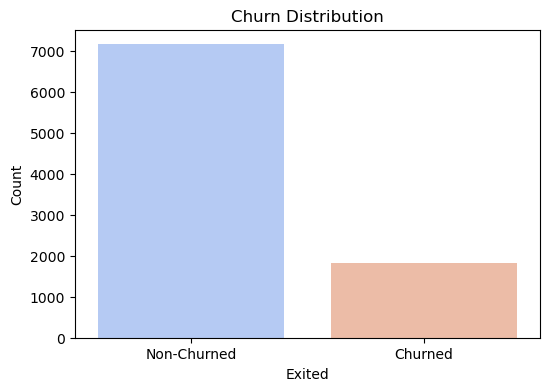

In [129]:
churn_counts = df_A['Exited'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette='coolwarm')
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Non-Churned', 'Churned'])
plt.ylabel('Count')
plt.show()

### Correlation between features and churn


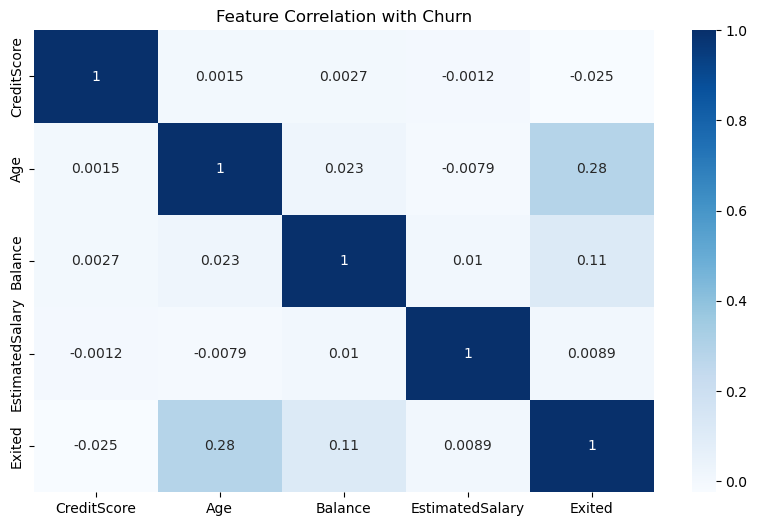

In [130]:
plt.figure(figsize=(10,6))
sns.heatmap(df_A[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']].corr(), annot=True, cmap='Blues')
plt.title('Feature Correlation with Churn')
plt.show()

B Dataset: Monthly Precipitation Normals (1981-2010)

    Basic Statistics:
        Calculate the mean, median, and range of precipitation values across weather stations.

    Precipitation Trends:
        Visualize the trend of precipitation data to see if there are any clear patterns over the years.

    Station Analysis:
        Identify weather stations with the highest and lowest average monthly precipitation.

Code Example for B Dataset Exploration:

In [70]:
# Check data types to inspect if all columns are numeric
print(df_B.dtypes)

# Convert all columns (starting from 2 onwards) to numeric, coercing errors
df_B.iloc[:, 2:] = df_B.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Check for missing values and data types after conversion
print(df_B.isnull().sum())
print(df_B.dtypes)

# Visualization of the first few stations' monthly precipitation
df_B.iloc[:, 2:].T.plot(figsize=(12,6), legend=False)
plt.title('Precipitation Trends Across Stations (Sample)')
plt.ylabel('Precipitation')
plt.show()

# Stations with highest and lowest average precipitation
df_B['avg_precipitation'] = df_B.iloc[:, 2:].mean(axis=1)
max_station = df_B.loc[df_B['avg_precipitation'].idxmax()]
min_station = df_B.loc[df_B['avg_precipitation'].idxmin()]
print(f"Station with highest average precipitation: {max_station}")
print(f"Station with lowest average precipitation: {min_station}")



AQC00914000    object
1981            int64
4279           object
3745           object
10762          object
6067           object
4096           object
3606           object
6203           object
5292           object
3092           object
6866           object
7163           object
7866           object
dtype: object
AQC00914000        0
1981               0
4279           55546
3745           51499
10762          49016
6067           44446
4096           43057
3606           42272
6203           42467
5292           41867
3092           41442
6866           43741
7163           48304
7866           56248
dtype: int64
AQC00914000    object
1981            int64
4279           object
3745           object
10762          object
6067           object
4096           object
3606           object
6203           object
5292           object
3092           object
6866           object
7163           object
7866           object
dtype: object


## C Dataset: 80 Cereals Nutrition Facts

    Nutritional Analysis:
        Explore which cereals have the highest and lowest calorie counts, fiber, and sugar content.

    Healthiest Cereals:
        Create a health index based on calories, fiber, and sugar, and rank the cereals.

    Cereal Manufacturer Analysis:
        See which manufacturers produce the cereals with the most nutritious profiles.

Code Example for C Dataset Exploration:

### Basic statistics of nutritional facts

In [ ]:
print(df_C[['calories', 'fiber', 'sugars']].describe())

### Cereal with highest and lowest calorie counts


In [ ]:
print(f"Cereal with highest calories: {df_C.loc[df_C['calories'].idxmax()]}")
print(f"Cereal with lowest calories: {df_C.loc[df_C['calories'].idxmin()]}")



### Create a health index (lower calories, higher fiber, lower sugar is better)

In [ ]:
df_C['health_index'] = (df_C['fiber'] / df_C['calories']) - (df_C['sugars'] / df_C['calories'])
print(df_C[['name', 'health_index']].sort_values(by='health_index', ascending=False).head())


### Plot cereal manufacturers and their average health index

In [ ]:
df_C.groupby('mfr')['health_index'].mean().plot(kind='bar', figsize=(8,6), color='green')
plt.title('Average Health Index by Manufacturer')
plt.ylabel('Health Index')
plt.show()
